In [1]:
from fuzzylogic.classes import Domain
from fuzzylogic.functions import R, S
from fuzzylogic.classes import  Domain
from fuzzylogic.functions import alpha, triangular
from fuzzylogic.hedges import plus, minus, very
import matplotlib.pyplot as plt
from fuzzylogic.functions import (sigmoid, gauss, trapezoid,
                                  triangular_sigmoid, rectangular, singleton)

NameError: name 'lable' is not defined

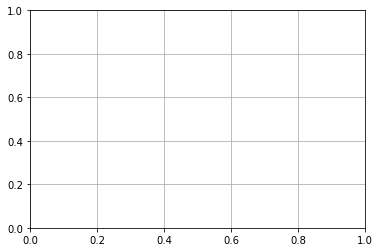

In [11]:
T = Domain('test', 0, 20, res = 0.1)
"""Domain использует маг атрибут __slots__ поэтому после его создания переменные создаются именно через домен.переменная 5 параметров: название, минимум, максимум, шаг дискретизации"""
def plot_scatter(x):    # Для отрисовки перпендикуляра точки
    plt.plot([x,x],[0,1], label = 'точка')
    plt.legend(loc='center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=2)
T.up = S(5,10)  # для спада
T.down = R(1,2) # для переднего фронта
plt.grid() # сетка
T.up.plot(label = '1') # Отрисовка созданной функции
T.down.plot()
plot_scatter(7)
T(7) # Для определения степени принадлежности данной точки к множеству
plt.show()

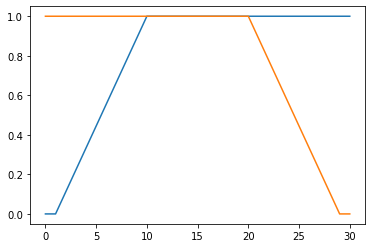

In [59]:
T = Domain("test", 0, 30, res=0.1)
T.up = R(1,10)
T.up.plot()
T.down = S(20, 29)
T.down.plot()

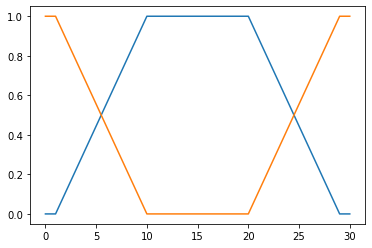

In [65]:
T.polygon = T.up & T.down # Работает как обычное логическое И
T.polygon.plot()
T.inv_polygon = ~T.polygon
T.inv_polygon.plot()

Различные функции границ множеств
sigmoid, gauss, trapezoid, triangular_sigmoid, rectangular, bounded_linear, singleton, linear, R, S

TypeError: float() argument must be a string or a number, not 'Set'

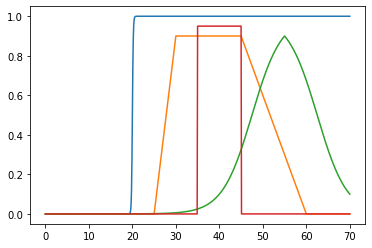

In [75]:
T = Domain("test", 0, 70, res=0.1)
T.sigmoid = sigmoid(1,10,20) # sigmoid(L, k, x0) f(x) = L / (1 + e^(-k*(x-x0))) L - Высота функции, k - крутизна, x0 центр сигмоида
T.sigmoid.plot()
T.gauss = gauss(10, .1, c_m=0.5) # gauss(c, b, *, c_m=1): c - точка максимума b - крутизна c_m - Высота функции
#T.gauss.plot()
T.trapezoid = trapezoid(25, 30, 45, 60, c_m=0.9) # ну тут понятно точки перегибов и высота
T.trapezoid.plot()
T.triangular_sigmoid = triangular_sigmoid(40, 70, c=55) # Начало, конец, центр
T.triangular_sigmoid.plot()
T.rectangular = rectangular(35, 45, c_m=0.95)
T.rectangular.plot()
plt.legend('sigmoid','gauss')
plt.plot()


{Set(<function minus.<locals>.f at 0x000001EE6300D160>): 0.5443310539518174,
 Set(<function very.<locals>.f at 0x000001EE6300D0D0>): 0.6400000000000001,
 Set(<function bounded_sum.<locals>.f at 0x000001EE64C96790>): 0.8359591794226543}

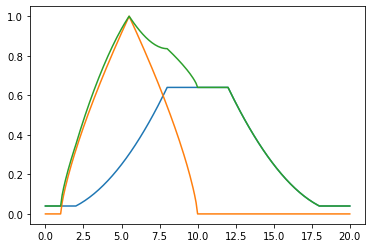

In [56]:
numbers = Domain("numbers", 0, 20, res=0.1)

close_to_10 = alpha(floor=0.2, ceiling=0.8, func=triangular(0, 20))
close_to_5 = triangular(1, 10)

numbers.foo = minus(close_to_5)
numbers.bar = very(close_to_10)

numbers.bar.plot()
numbers.foo.plot()
numbers.baz = numbers.foo + numbers.bar
numbers.baz.plot()

numbers(8)